### Predicting players rating

In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.<br>
Download the data in the same folder and run the following commmand to get it in the environment

#### About the Dataset

The ultimate Soccer database for data analysis and
machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.
+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the
weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000
matches
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

#### Python skills required to complete this project

SQL:
The data is in SQL database so students need to retrive using query language. They also need to
know how to connect SQL database woth python. The library we are using for this in 'sqlite3'.

SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring.
It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You
do not need to install this module separately because it is shipped by default along with Python
version 2.5.x onwards.
To use sqlite3 module, you must first create a connection object that represents the database and
then optionally you can create a cursor object, which will help you in executing all the SQL
statements.
Pandas:
Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use
data structures and data analysis tools for the Python programming language. Python with Pandas
is used in a wide range of fields including academic and commercial domains including finance,
economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of Python
Pandas and how to use them in practice.
Scikit Learn
Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent
interface in Python.
The library is built upon the SciPy (Scientific Python) that must be installed before you can use
scikit-learn. This stack that includes:
NumPy: Base n-dimensional array package
SciPy: Fundamental library for scientific computing
Matplotlib: Comprehensive 2D/3D plotting
IPython: Enhanced interactive console
Sympy: Symbolic mathematics
Pandas: Data structures and analysis
Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides
learning algorithms and is named scikit-learn.
The vision for the library is a level of robustness and support required for use in production systems.
This means a deep focus on concerns such as easy of use, code quality, collaboration,
documentation and performance.

#### Machine Learning skills required to complete the Project
**Supervised learning**<br>
Supervised learning deals with learning a function from available training data. A supervised
learning algorithm analyzes the training data and produces an inferred function, which can be used
for mapping new examples.

**Regression**<br>
Regression is a parametric technique used to predict continuous (dependent) variable given a set of
independent variables. It is parametric in nature because it makes certain assumptions (discussed
next) based on the data set. If the data set follows those assumptions, regression gives incredible
results.

**Model evaluation**<br>
Student must know how to judge a model on unseen data. What metric to select to judge the
performance

#### Let's get started.....

**Import Libraries**

In [108]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

#### Step 1: Create SQL connection and load dataset

In [3]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
df.shape

(183978, 42)

##### Check for numeric variables distribution

In [10]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [6]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

##### Check for missing values...

In [27]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

it is evident that the **dependent** column has missing values as we see a **pattern in missingness** , thus remove rows with missing values across data

In [35]:
# Removing the missing rows from dataframe
data = df[np.isfinite(df.overall_rating)]
data.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle     

Excluding rows with missing values in dependent variable

In [36]:
data.shape

(183142, 42)

##### Check for categorical columns

In [38]:
cat_cols = data.dtypes[data.dtypes == 'object'].index
cat_cols

Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [39]:
data[cat_cols].nunique()

date                   197
preferred_foot           2
attacking_work_rate      8
defensive_work_rate     19
dtype: int64

In [43]:
data[cat_cols].isnull().sum()

date                      0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
dtype: int64

In [40]:
data.defensive_work_rate.value_counts()/df.shape[0]

medium    0.711205
high      0.146980
low       0.100186
_0        0.013012
o         0.008425
1         0.002397
ormal     0.001892
2         0.001859
3         0.001402
5         0.001272
7         0.001179
0         0.001071
6         0.001071
9         0.000826
4         0.000631
es        0.000576
ean       0.000565
tocky     0.000484
8         0.000424
Name: defensive_work_rate, dtype: float64

Replace the values with appropriate values

In [55]:
ls1 = ['_0','o','0','1','2','3','ormal','es','ean','tocky']
ls2 =['4','5','6']
ls3 =['7','8','9']

for i in ls1:
    data.defensive_work_rate.replace({i:'low'},inplace=True)
    for j in ls2:
        data.defensive_work_rate.replace({j:'medium'},inplace=True)
        for h in ls3:
            data.defensive_work_rate.replace({h:'high'},inplace=True)

In [56]:
data.defensive_work_rate.value_counts()/df.shape[0]

medium    0.714178
high      0.149409
low       0.131869
Name: defensive_work_rate, dtype: float64

In [41]:
data.attacking_work_rate.value_counts()/df.shape[0]

medium    0.679810
high      0.232762
low       0.046576
None      0.019780
norm      0.001892
y         0.000576
le        0.000565
stoc      0.000484
Name: attacking_work_rate, dtype: float64

In [50]:
data.attacking_work_rate.replace({'norm':'low','y':'low','le':'low','stoc':'low','None':'low'},inplace=True)

In [46]:
from scipy.stats import mode
# data.attacking_work_rate.fillna(mode(data.attacking_work_rate.astype(str)).mode[0],inplace=True)

In [51]:
data.attacking_work_rate.value_counts()/df.shape[0]

medium    0.692822
high      0.232762
low       0.069872
Name: attacking_work_rate, dtype: float64

In [42]:
data.preferred_foot.unique()

array(['right', 'left'], dtype=object)

In [58]:
type(data.date)

pandas.core.series.Series

##### Derive new columns from Date field

In [61]:
data['year'] = pd.DatetimeIndex(data.date).year
data['month'] = pd.DatetimeIndex(data.date).month
data['day'] = pd.DatetimeIndex(data.date).day

In [ ]:
data.drop('date',axis=1, inplace=True)

In [67]:
cat_cols1 = data.columns[data.dtypes=='object']
cat_cols1

Index(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [64]:
data.head(2)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day
0,1,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,2,18
1,2,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11,19


#### Step2: Data Exploration...

##### Check the dependent variable skewness

The skewness is: -0.19936732712920868


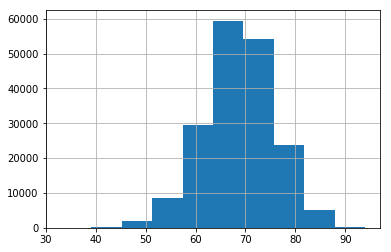

In [69]:
print('The skewness is:',data.overall_rating.skew())
data.overall_rating.hist()

#### Step3: Model Building... 

##### Convert categorical data into numeric data

In [110]:
# Exclude the columns with ids
rel_col = [x for x in data.columns if x not in (['id','player_fifa_api_id','player_api_id'])]

##### Convert categorical columns into numeric columns

In [71]:
from sklearn.preprocessing import LabelEncoder
for i in cat_cols1:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [111]:
# Devide data into X and y
y = data.overall_rating
X = data[rel_col].drop('overall_rating',axis=1)

##### Build Linear regression model with Imputer()

In [112]:
# Using pipeline method...
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
linreg = LinearRegression()
steps = [('imputation', imp),('linear_regression', linreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                 test_size=0.3, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('The model score is:',pipeline.score(X_test, y_test))
print('The RMSE is:',np.sqrt(mean_squared_error(y_pred,y_test)))

The model score is: 0.8497409996117686
The RMSE is: 2.7355504573799614


#### Building Base models with all columns...

In [113]:
X.fillna(X.mean(),inplace=True)

In [97]:
from sklearn.ensemble import RandomForestRegressor
models = []
models.append(('Lin_Reg:',LinearRegression()))
models.append(('Ridge:',Ridge(alpha=0.5, normalize=True)))
models.append(('Lasso:', Lasso(alpha=0.5, normalize=True)))
models.append(('ElasticNet:',ElasticNet(alpha=0.5, l1_ratio=0.5, normalize=True)))
models.append(('Decision_Tree:',DecisionTreeRegressor(max_depth=5)))
# models.append(('Random_Forest:', RandomForestRegressor(n_estimators=100)))

In [99]:
results=[]
names=[]
scoring = 'mean_squared_error'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Lin_Reg:: -6.283687 (0.139219)
Ridge:: -8.373024 (0.248824)
Lasso:: -49.587108 (1.701797)
ElasticNet:: -49.587108 (1.701797)
Decision_Tree:: -11.231922 (0.448858)


From the above models we can understand that linear regression is giving minimum CV errors comapred to other models

#### Building Decision tree model...

In [114]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y,
                                 test_size=0.3, random_state=40)

dtree = DecisionTreeRegressor(max_depth=3, random_state=2)
kfold = KFold(n_splits=10,random_state=3 )
scores = cross_val_score(dtree,x_train,Y_train, cv=kfold, scoring='mean_squared_error')
print('The CV score for Dtree is: %f (%f)' % (scores.mean(), scores.std()))
dtree.fit(x_train,Y_train)
pred = dtree.predict(x_test)
print('The RMSE on validation data is:',np.sqrt(mean_squared_error(pred,Y_test)))


The CV score for Dtree is: -16.132224 (0.206242)
The RMSE on validation data is: 4.0352239258848845


#### Building Random Forest Model...

In [115]:
from scipy.stats import randint as sp_randint
params = { 'n_estimators': sp_randint(50, 1000),
         'max_depth': sp_randint(2,8),
         'min_samples_leaf': sp_randint(5,50),
         'min_samples_split': sp_randint(5,50)}

In [118]:
rf = RandomForestRegressor()
rscv = RandomizedSearchCV(rf, param_distributions=params, n_iter=10, verbose=1)

In [ ]:
rscv.fit(x_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
rscv.best_params_

In [ ]:
pred = rscv.predict(x_test)
print('The RMSE on validation data is:',np.sqrt(mean_squared_error(pred,Y_test)))